In [107]:
# https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html

In [108]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('prueba.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

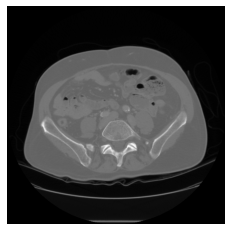

In [109]:
# Imagen original
plt.axis("off")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

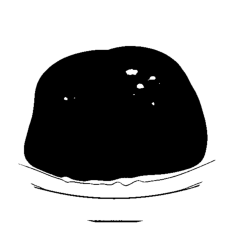

In [110]:
# Imagen en escala de grisese
plt.axis("off")
plt.imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
plt.show()

In [111]:
# Filtrado de la imagen 
# eliminacion de ruido
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# area de fondo
sure_bg = cv.dilate(opening,kernel,iterations=3)
# area de interes
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# encontrando la region desconocida
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [112]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

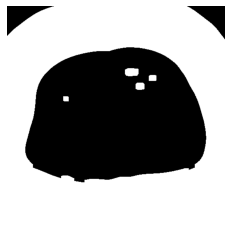

In [113]:
# ploteo de region desconocida
plt.axis("off")
plt.imshow(cv.cvtColor(unknown, cv.COLOR_BGR2RGB))
plt.show()

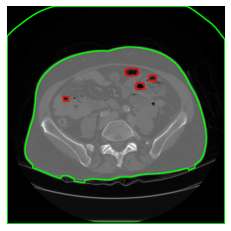

In [114]:
# https://stackoverflow.com/questions/22240746/recognize-open-and-closed-shapes-opencv
contours, hierarchy = cv.findContours(unknown, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
hierarchy = hierarchy[0]

for i, c in enumerate(contours):
    if hierarchy[i][2] < 0 and hierarchy[i][3] < 0:
        cv.drawContours(img, contours, i, (0, 0, 255), 2)
    else:
        cv.drawContours(img, contours, i, (0, 255, 0), 2)
#write to the same directory
plt.axis("off")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()